In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.utils import shuffle

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trustnews-website-database/trustnews_data.csv
/kaggle/input/wataneya-website-dataset/wataneya_data.csv
/kaggle/input/aravec-documents/full_grams_sg_300_twitter/full_grams_sg_300_twitter.mdl
/kaggle/input/aravec-documents/full_grams_sg_300_twitter/full_grams_sg_300_twitter.mdl.trainables.syn1neg.npy
/kaggle/input/aravec-documents/full_grams_sg_300_twitter/full_grams_sg_300_twitter.mdl.wv.vectors.npy


In [2]:
wataneya_data=pd.read_csv('/kaggle/input/wataneya-website-dataset/wataneya_data.csv')
trustnews_data=pd.read_csv("/kaggle/input/trustnews-website-database/trustnews_data.csv")

In [3]:
print(len(wataneya_data),len(trustnews_data))

2250 2098


In [4]:
data=shuffle(pd.concat([wataneya_data,trustnews_data]))

In [5]:
data.reset_index(inplace=True)

In [6]:
data.head()

,level_0,Unnamed: 0,category,type,texts,fake,index
0,238,238,ﺳﻴﺎﺳﺔ,ﻣﻀﻠﻞ,"""رسميا 45 قاضي تحت الاجراء الحدودي s17"" ... ...",0,214.0
1,1132,1132,متفرقات,ﺻﺤﻴﺢ,عودة تدريجية للأجواء الشتويةتتسم حالة الطقس ال...,1,NaN
2,540,540,ﻣﺠﺘﻤﻊ,ﺻﺤﻴﺢ,جامعة التعليم الثانوي تقرّر عدم التعامل مع ...,1,NaN
3,330,330,covid-19,ﻣﻀﻠﻞ,الأصلع ليس أكثر عرضة للكورونا من غيره ب...,0,275.0
4,628,628,ﺇﻗﺘﺼﺎﺩ,ﺯاﺋﻒ,"لا صحة لخبر الزيادة في سعر الخبز ,دقق فر...",0,65.0


In [7]:
data.drop(['index','Unnamed: 0','level_0'], axis=1,inplace=True)

In [8]:
data.head()

,category,type,texts,fake
0,ﺳﻴﺎﺳﺔ,ﻣﻀﻠﻞ,"""رسميا 45 قاضي تحت الاجراء الحدودي s17"" ... ...",0
1,متفرقات,ﺻﺤﻴﺢ,عودة تدريجية للأجواء الشتويةتتسم حالة الطقس ال...,1
2,ﻣﺠﺘﻤﻊ,ﺻﺤﻴﺢ,جامعة التعليم الثانوي تقرّر عدم التعامل مع ...,1
3,covid-19,ﻣﻀﻠﻞ,الأصلع ليس أكثر عرضة للكورونا من غيره ب...,0
4,ﺇﻗﺘﺼﺎﺩ,ﺯاﺋﻒ,"لا صحة لخبر الزيادة في سعر الخبز ,دقق فر...",0


# **Data Description**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4348 entries, 0 to 4347
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  4348 non-null   object
 1   type      4348 non-null   object
 2   texts     4348 non-null   object
 3   fake      4348 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 136.0+ KB


In [10]:
print("Data Shape:", data.shape)

Data Shape: (4348, 4)


<AxesSubplot:xlabel='fake', ylabel='count'>

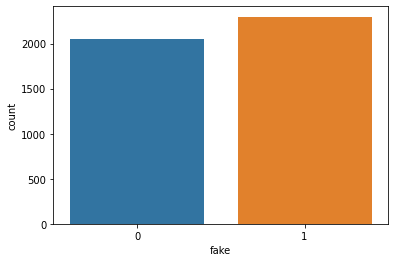

In [11]:
sns.countplot(x='fake', data=data)

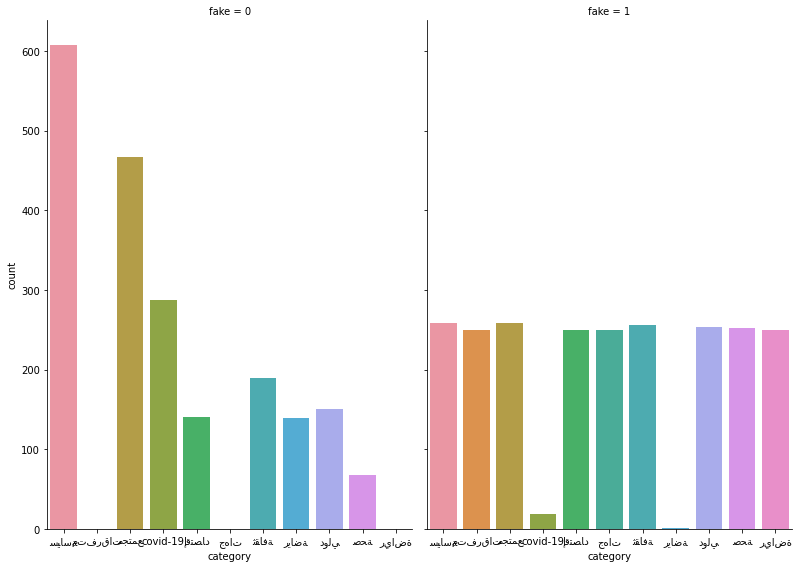

In [12]:
g = sns.catplot(x="category", col="fake",
                data=data, kind="count",
                height=8, aspect=.7);

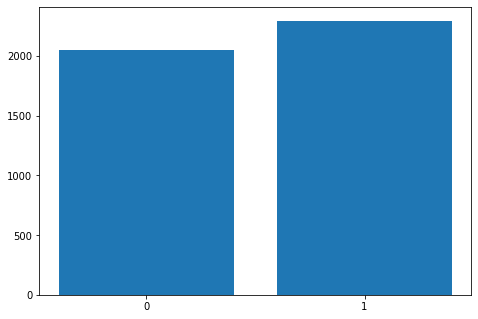

In [13]:
lista=[(data.fake == 0).sum(),(data.fake == 1).sum()]
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['0', '1']
ax.bar(langs,lista)
plt.show()

# **Data Preparation**

In [14]:
import string,re
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\t', '', text)
    text = re.sub('\r', '', text)
    return text


In [15]:
data['texts'] = data['texts'].apply(lambda x: remove_punct(x))

Arabic words cleaning

https://github.com/saobou/arabic-text-preprocessing/blob/master/Preprocess.ipynb

In [16]:
!pip install pyarabic
!pip install farasapy
!pip install tashaphyne

     |████████████████████████████████| 251 kB 923 kB/s            


In [17]:
from nltk.corpus import stopwords
from textblob import TextBlob

from tashaphyne.stemming import ArabicLightStemmer
from nltk.stem.isri import ISRIStemmer
import tashaphyne.arabic_const as arabconst 

stops = set(stopwords.words("arabic"))
stop_word_comp = {"،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان"}
ArListem = ArabicLightStemmer()


def stem(text):
    zen = TextBlob(text)
    words = zen.words
    cleaned = list()
    for w in words:
        ArListem.light_stem(w)
        cleaned.append(ArListem.get_root())
    return " ".join(cleaned)

import pyarabic.araby as araby
def normalizeArabic(text):
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation
    return araby.strip_tashkeel(text)

def remove_stop_words(text):
    zen = TextBlob(text)
    words = zen.words
    return " ".join([w for w in words if not w in stops and not w in stop_word_comp and len(w) >= 2])

Trying examples

In [18]:
text="قالوا الموفقُ شِيعِيٌّ فقلتُ لهم"
normalizeArabic(text)

'قالوا الموفق شيعي فقلت لهم'

In [19]:
test=data['texts'][5]
print(test)

قبلي تنظيم وقفة مساندة ومسيرة سلمية للتعبير عن مساندة قرارات رئيس الجمهورية نظم عدد من نشطاء المجتمع المدني وممثلي بعض الاحزاب، صباح اليوم الاحد، وقفة مساندة امام مقر الولاية ومسيرة سلمية جابت ابرز شوارع المدينة رفعوا خلالها شعارات تعبر عن دعمهم للقرارات التي اتخذها رئيس الجمهورية يوم  جويلية الماضيوقال عدد من المشاركين في هذه المسيرة ان هذا التحرك الذي يعبر عن مساندة رئيس الجمهورية قيس سعيد، يؤكد تمسك اغلب التونسيين بالقرارات التي حسمت مع منظومة الخراب التي سادت البلاد طيلة  سنوات على حد تعبيرهم، واكدوا ان تاريخ  جويلية يمثل بالنسبة لهم محطة فاصلة في تاريخ تونس التي تم الشروع في استرجاعها من ايدي المخربينواشاروا الى ان خروجهم اليوم في هذا التحرك الوطني على حد تعبيرهم، يؤكد التفافهم حول رئيس الجمهورية وحول المسار الذي ينتهجه والذي يجب مواصلته لاسترجاع السيادة الوطنية وتحقيق مطالب المواطنين، ودعوا الى الاسراع بمحاسبة المفسدين و المجرمين في حق الوطن و المتسببين في انتشار الارهاب بالبلادواعتبروا ان نجاح رئيس الجمهورية في القطع مع منظومة ما قبل  جويلية يستوجب حل البرلمان والعمل على اعادة ا

In [20]:
normalizeArabic(test)

'قبلي تنظيم وقفه مسانده ومسيره سلميه للتعبير عن مسانده قرارات رءيس الجمهوريه\xa0نظم عدد من نشطاء المجتمع المدني وممثلي بعض الاحزاب، صباح اليوم الاحد، وقفه مسانده امام مقر الولايه ومسيره سلميه جابت ابرز شوارع المدينه رفعوا خلالها شعارات تعبر عن دعمهم للقرارات التي اتخذها رءيس الجمهوريه يوم  جويليه الماضيوقال عدد من المشاركين في هذه المسيره ان هذا التحرك الذي يعبر عن مسانده رءيس الجمهوريه قيس سعيد، يءكد تمسك اغلب التونسيين بالقرارات التي حسمت مع منظومه الخراب التي سادت البلاد طيله  سنوات علي حد تعبيرهم، واكدوا ان تاريخ  جويليه يمثل بالنسبه لهم محطه فاصله في تاريخ تونس التي تم الشروع في استرجاعها من ايدي المخربينواشاروا الي ان خروجهم اليوم في هذا التحرك الوطني علي حد تعبيرهم، يءكد التفافهم حول رءيس الجمهوريه وحول المسار الذي ينتهجه والذي يجب مواصلته لاسترجاع السياده الوطنيه وتحقيق مطالب المواطنين، ودعوا الي الاسراع بمحاسبه المفسدين و المجرمين في حق الوطن و المتسببين في انتشار الارهاب بالبلادواعتبروا ان نجاح رءيس الجمهوريه في القطع مع منظومه ما قبل  جويليه يستوجب حل البرلمان والعمل علي اعا

In [21]:
remove_stop_words(test)

'قبلي تنظيم وقفة مساندة ومسيرة سلمية للتعبير مساندة قرارات رئيس الجمهورية نظم نشطاء المجتمع المدني وممثلي الاحزاب، الاحد، وقفة مساندة مقر الولاية ومسيرة سلمية جابت ابرز شوارع المدينة رفعوا خلالها شعارات تعبر دعمهم للقرارات اتخذها رئيس الجمهورية الماضيوقال المشاركين المسيرة التحرك يعبر مساندة رئيس الجمهورية قيس سعيد، يؤكد تمسك اغلب التونسيين بالقرارات حسمت منظومة الخراب سادت البلاد طيلة حد تعبيرهم، واكدوا تاريخ يمثل بالنسبة محطة فاصلة تاريخ تونس الشروع استرجاعها ايدي المخربينواشاروا خروجهم التحرك الوطني حد تعبيرهم، يؤكد التفافهم رئيس الجمهورية وحول المسار ينتهجه يجب مواصلته لاسترجاع السيادة الوطنية وتحقيق مطالب المواطنين، ودعوا الاسراع بمحاسبة المفسدين المجرمين حق الوطن المتسببين انتشار الارهاب بالبلادواعتبروا نجاح رئيس الجمهورية القطع منظومة يستوجب حل البرلمان والعمل الاعتبار للمواطن الاهتمام بالمقدرة الشرائية ومعالجة الاشكاليات طالت القطاعات وخاصة القطاعين الصحي والفلاحي'

In [22]:
stem(test) 

'قبل نظم وقف سند مسر سلم عبر عن سند قرر رءس جمهر نظم عدد من شطط جمع مدن مثل بعض حزب، صباح ولم حد، وقف سند موم قرر ولل مسر سلم جوب برز شرع مدن رفع خلال شعر عبر عن دعم قرر التي تخذ رءس جمهر يوم جول ضقل عدد من شرك في هذه مسر ن هذا حرك الذي عبر عن سند رءس جمهر قيس عد، ءكد مسك غلب ونس قرر التي حسم مع نظم خرب التي سود بلد طيل سنو على حدد عبرهم، وكد ن ورخ جول مثل نسب هم محط وصل في ورخ ونس التي تمم شرع في رجع من يدي لمخربنشر ولي ن خرج ولم في هذا حرك وطن على حدد عبرهم، ءكد فوف حول رءس جمهر حول مسر الذي نهج الذي جبب مصل رجع لسد وطن حقق طلب طنن، ودع ولي سرع حسب فسد و جرم في حقق وطن و سبب في نتشر رهب بلبلدعتبر ن نجح رءس جمهر في قطع مع نظم ما قبل جول وجب حلل برلم عمل على وعد عتبر وطن من خلال هتمم قدر شرء علج شكل التي طول جميع قطع وخص من قطع صحح فلح'

In [23]:
def remove_dirt_after_transformation(text):
    return re.sub('[a-z]|[A_Z]|[0-9]|\n|:|N|,*', '', text)

In [24]:
data['texts'] = data['texts'].apply(lambda x:normalizeArabic(x))
data['texts'] = data['texts'].apply(lambda x:remove_stop_words(x))
data['texts'] = data['texts'].apply(lambda x:stem(x))

In [25]:
data.head()

,category,type,texts,fake
0,ﺳﻴﺎﺳﺔ,ﻣﻀﻠﻞ,رسم قوض جرء حدد ضلل حري فرق روس نوز خبر شرر مد...,0
1,متفرقات,ﺻﺤﻴﺢ,عود درج لجء لشتهتتسم حول طقس سبت، بعد درج لجء ...,1
2,ﻣﺠﺘﻤﻊ,ﺻﺤﻴﺢ,جمع علم لثن قرر عمل وزر ترب خصص قرر زمم حمو سر...,1
3,covid-19,ﻣﻀﻠﻞ,صلع عرض كرو غير رجع ولي درس دله خصص علق صلع كر...,0
4,ﺇﻗﺘﺼﺎﺩ,ﺯاﺋﻒ,صحح خبر زود عرر خبز دقق فرق روس نوز خبر شرر عد...,0


# **Machine learning Apporach**

In [26]:
from sklearn.model_selection import train_test_split
X = data.texts.values
y = data.fake.values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,shuffle=True, random_state=42)

In [28]:
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

Creating a pipline using tf-idf for words embedding and different models.

In [29]:
def train_model(model, data, targets):
    text_clf = Pipeline([
    ('vect',TfidfVectorizer()),
    ('clf', model),
    ])
    text_clf.fit(data, targets)
    return text_clf

In [30]:
def get_accuracy(trained_model,X, y):
    predicted = trained_model.predict(X)
    accuracy = np.mean(predicted == y)
    return accuracy

In [31]:
def get_F1(trained_model,X,y):
    predicted=trained_model.predict(X)
    f1=f1_score(y,predicted, average=None)
    return f1

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

In [32]:
from sklearn.linear_model import LogisticRegression
trained_clf_logistic_regressing = train_model(LogisticRegression(),X_train, y_train)
y_pred=trained_clf_logistic_regressing.predict(X_test)
accuracy_LR = get_accuracy(trained_clf_logistic_regressing,X_test, y_test)
f1_Score=get_F1(trained_clf_logistic_regressing,X_test,y_test)
print(f"Test dataset accuracy with LogisticRegression: {accuracy_LR:.5f}")
print("Test dataset f1-score with LogisticRegression:",f1_Score)
print(classification_report(y_test, y_pred))

Test dataset accuracy with LogisticRegression: 0.96245
Test dataset f1-score with LogisticRegression: [0.96051571 0.96420745]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       626
           1       0.96      0.97      0.96       679

    accuracy                           0.96      1305
   macro avg       0.96      0.96      0.96      1305
weighted avg       0.96      0.96      0.96      1305



In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

In [33]:
from sklearn.neighbors import KNeighborsClassifier
trained_clf_kNeighbor = train_model(KNeighborsClassifier(),X_train, y_train)
y_pred=trained_clf_kNeighbor.predict(X_test)
accuracy_KN = get_accuracy(trained_clf_kNeighbor,X_test, y_test)
f1_Score=get_F1(trained_clf_kNeighbor,X_test,y_test)
print(f"Test dataset accuracy with kNeighbor: {accuracy_KN:.5f}")
print("Test dataset f1-score with kNeighbor:",f1_Score)
print(classification_report(y_test, y_pred))

Test dataset accuracy with kNeighbor: 0.87050
Test dataset f1-score with kNeighbor: [0.85690093 0.88173548]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       626
           1       0.84      0.93      0.88       679

    accuracy                           0.87      1305
   macro avg       0.88      0.87      0.87      1305
weighted avg       0.87      0.87      0.87      1305



This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

In [34]:
from sklearn.tree import DecisionTreeClassifier
trained_clf_decision_tree = train_model(DecisionTreeClassifier(),X_train, y_train)
y_pred=trained_clf_decision_tree.predict(X_test)
accuracy_DT = get_accuracy(trained_clf_decision_tree,X_test, y_test)
f1_Score=get_F1(trained_clf_decision_tree,X_test,y_test)
print(f"Test dataset accuracy with DecisionTreeClassifier: {accuracy_DT:.5f}")
print("Test dataset f1-score with DecisionTreeClassifier:",f1_Score)
print(classification_report(y_test, y_pred))

Test dataset accuracy with DecisionTreeClassifier: 0.94100
Test dataset f1-score with DecisionTreeClassifier: [0.93755069 0.94408134]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       626
           1       0.93      0.96      0.94       679

    accuracy                           0.94      1305
   macro avg       0.94      0.94      0.94      1305
weighted avg       0.94      0.94      0.94      1305



In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

In [35]:
from sklearn.naive_bayes import MultinomialNB
trained_clf_multinomial_nb = train_model(MultinomialNB(), X_train, y_train)
y_pred=trained_clf_multinomial_nb.predict(X_test)
accuracy_NB = get_accuracy(trained_clf_multinomial_nb,X_test, y_test)
f1_Score=get_F1(trained_clf_multinomial_nb,X_test,y_test)
print(f"Test dataset accuracy with MultinomialNB: {accuracy_NB:.5f}")
print("Test dataset f1-score with DecisionTreeClassifier:",f1_Score)
print(classification_report(y_test, y_pred))

Test dataset accuracy with MultinomialNB: 0.91648
Test dataset f1-score with DecisionTreeClassifier: [0.90659811 0.92446292]
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       626
           1       0.87      0.98      0.92       679

    accuracy                           0.92      1305
   macro avg       0.93      0.91      0.92      1305
weighted avg       0.92      0.92      0.92      1305



Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

In [36]:
from sklearn.svm import SVC
trained_clf_SVC = train_model(SVC(), X_train, y_train)
y_pred=trained_clf_SVC.predict(X_test)
accuracy_SVC = get_accuracy(trained_clf_SVC,X_test, y_test)
f1_Score=get_F1(trained_clf_SVC,X_test,y_test)
print(f"Test dataset accuracy with SVC: {accuracy_SVC:.5f}")
print("Test dataset f1-score with SVC:",f1_Score)
print(classification_report(y_test, y_pred))

Test dataset accuracy with SVC: 0.97241
Test dataset f1-score with SVC: [0.97115385 0.97356828]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       626
           1       0.97      0.98      0.97       679

    accuracy                           0.97      1305
   macro avg       0.97      0.97      0.97      1305
weighted avg       0.97      0.97      0.97      1305



The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

In [37]:
from sklearn.ensemble import RandomForestClassifier
trained_clf_random_forest = train_model(RandomForestClassifier(), X_train, y_train)
y_pred=trained_clf_random_forest.predict(X_test)
accuracy_RF = get_accuracy(trained_clf_random_forest,X_test, y_test)
f1_Score=get_F1(trained_clf_random_forest,X_test,y_test)
print(f"Test dataset accuracy with RandomForestClassifier: {accuracy_RF:.5f}")
print("Test dataset f1-score with RandomForestClassifier:",f1_Score)
print(classification_report(y_test, y_pred))

Test dataset accuracy with RandomForestClassifier: 0.97241
Test dataset f1-score with RandomForestClassifier: [0.97096774 0.97372263]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       626
           1       0.97      0.98      0.97       679

    accuracy                           0.97      1305
   macro avg       0.97      0.97      0.97      1305
weighted avg       0.97      0.97      0.97      1305



We finish off with XGBoost which is also one of the most popular machine learning algorithm these days. Regardless of the type of prediction task at hand; regression or classification.XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks Reference [Wikipedia](https://en.wikipedia.org/wiki/XGBoost)

In [38]:
from xgboost import XGBClassifier
trained_clf_XGB = train_model(XGBClassifier(learning_rate=0.2,use_label_encoder=False), X_train, y_train)
y_pred=trained_clf_XGB.predict(X_test)
accuracy_xgb = get_accuracy(trained_clf_XGB,X_test, y_test)
f1_Score=get_F1(trained_clf_XGB,X_test,y_test)
print(f"Test dataset accuracy with trained_clf_XGB: {accuracy_xgb:.5f}")
print("Test dataset f1-score with trained_clf_XGB:",f1_Score)
print(classification_report(y_test, y_pred))

[23:14:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test dataset accuracy with trained_clf_XGB: 0.97778
Test dataset f1-score with trained_clf_XGB: [0.97666935 0.97878566]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       626
           1       0.97      0.99      0.98       679

    accuracy                           0.98      1305
   macro avg       0.98      0.98      0.98      1305
weighted avg       0.98      0.98      0.98      1305



**Conclusion**

In [39]:
models = pd.DataFrame({
    'Model': ['Xtreme Gradient Boost','Logistic Regression','kNeighbours','Decision Tree','Naive Bayes','Support Vector Machine','Random Forest'],
    'Score': [accuracy_xgb,accuracy_LR,accuracy_KN,accuracy_DT,accuracy_NB,accuracy_SVC,accuracy_RF]})
models.sort_values(by='Score', ascending=False).reset_index().drop(['index'], axis=1)

,Model,Score
0,Xtreme Gradient Boost,0.977778
1,Support Vector Machine,0.972414
2,Random Forest,0.972414
3,Logistic Regression,0.962452
4,Decision Tree,0.940996
5,Naive Bayes,0.916475
6,kNeighbours,0.870498


# **Deep Learning Approach**

In [40]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from numpy import array
import gensim
from gensim.models import KeyedVectors
from gensim.models import word2vec
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

The Tokenizer()function will split the sentence into tokens. The texts_to_sequences()convert word to integer number. 

In [41]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(data["texts"])
vocab_size = len(t.word_index) + 1

In [42]:
list_tokenized_train=t.texts_to_sequences(X_train)
list_tokenized_test=t.texts_to_sequences(X_test)

In [43]:
#list_tokenized_train[:1] just for testing

Checking word distribution to pick the max sentence length

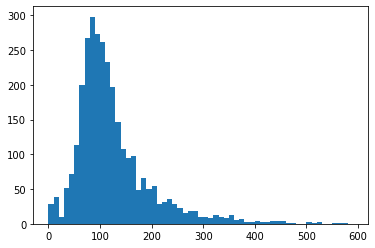

In [44]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]
plt.hist(totalNumWords,bins = np.arange(0,600,10))
plt.show()

Most words have a length around 120 and all are less than 600 its a big number but better pick 580 to prevent any information loss

In [45]:
maxlen = 580
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

**LSTM**


In [46]:
inp = Input(shape=(maxlen, ))
embed_size = 100
x = Embedding(vocab_size, embed_size)(inp)
x = LSTM(100, return_sequences=True,name='lstm_layer')(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
#x = Dropout(0.1)(x)
x = Dense(1, activation="sigmoid")(x)

2022-03-11 23:14:19.278258: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-11 23:14:19.279394: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-11 23:14:19.280068: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-11 23:14:19.280807: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [47]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [48]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 580)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 580, 100)          2524900   
_________________________________________________________________
lstm_layer (LSTM)            (None, 580, 100)          80400     
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                5050      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51    

In [49]:
model.fit(X_t,y_train, batch_size=32, epochs=10, validation_split=0.1)

2022-03-11 23:14:24.198050: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-03-11 23:14:26.661772: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


86/86 [==============================] - 6s 33ms/step - loss: 0.6041 - accuracy: 0.7549 - val_loss: 0.2768 - val_accuracy: 0.9016
Epoch 2/10
86/86 [==============================] - 2s 28ms/step - loss: 0.1240 - accuracy: 0.9682 - val_loss: 0.1438 - val_accuracy: 0.9672
Epoch 3/10
86/86 [==============================] - 2s 28ms/step - loss: 0.0596 - accuracy: 0.9887 - val_loss: 0.1048 - val_accuracy: 0.9705
Epoch 4/10
86/86 [==============================] - 2s 29ms/step - loss: 0.0495 - accuracy: 0.9890 - val_loss: 0.1437 - val_accuracy: 0.9639
Epoch 5/10
86/86 [==============================] - 2s 28ms/step - loss: 0.0336 - accuracy: 0.9920 - val_loss: 0.1792 - val_accuracy: 0.9607
Epoch 6/10
86/86 [==============================] - 3s 30ms/step - loss: 0.0231 - accuracy: 0.9960 - val_loss: 0.1515 - val_accuracy: 0.9607
Epoch 7/10
86/86 [==============================] - 2s 28ms/step - loss: 0.0135 - accuracy: 0.9971 - val_loss: 0.2068 - val_accuracy: 0.9607
Epoch 8/10
86/86 [======

In [50]:
#preds = model.predict(X_te, batch_size=32)
#print(preds)

In [51]:
loss,acc = model.evaluate(X_te,y_test, verbose = 0, batch_size = 32)
print("acc: %.5f" % (acc))

acc: 0.96858


**LSTM with a pretrained word2vec model aravec**

loading the AraVec Skip-gram word embedding 

In [52]:
w2v_embeddings_index={}
TOTAL_EMBEDDING_DIM=300
embeddings_file='../input/aravec-documents/full_grams_sg_300_twitter/full_grams_sg_300_twitter.mdl'
w2v_model =KeyedVectors.load(embeddings_file)


In [53]:
words = list(w2v_model.wv.index_to_key)

In [54]:
w2v_embeddings_index={}
for key in words:
    w2v_embeddings_index[key] =w2v_model.wv.get_vector(key)

In [55]:
print("Loaded %s word vectors."% len(w2v_embeddings_index))

Loaded 1476715 word vectors.


create a weight matrix for words in training docs

In [56]:
embedding_matrix = np.zeros((vocab_size, TOTAL_EMBEDDING_DIM))
for word, i in t.word_index.items():
    embedding_vector = w2v_embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [57]:
print("Embedding Matrix shape:", embedding_matrix.shape)

Embedding Matrix shape: (25249, 300)


The embedding layer is seeded by AraVec word embedding weight. The 300-dimensional Twitter Skip-gram version 3 was chosen. Therefore, the embedding layer defend with output_dim equal to 300.

In [58]:
embedding_layer = tf.keras.layers.Embedding(vocab_size, TOTAL_EMBEDDING_DIM, weights=[embedding_matrix], input_length=maxlen, trainable=False)

In [59]:
input_placeholder= Input(shape=(maxlen,))
input_embedding = embedding_layer(input_placeholder)
lstm= LSTM(100, return_sequences=True,name='lstm_layer_2')(input_embedding)
y = GlobalMaxPool1D()(lstm)
#y = Dropout(0.1)(y)
y = Dense(50, activation="relu")(lstm)
y = Dropout(0.1)(y)
preds = Dense(1, activation='sigmoid', name = 'activation')(y)
modelaravec = Model(inputs=input_placeholder, outputs=preds)

In [60]:
modelaravec.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
#modelaravec.fit(X_t,y_train, batch_size=32, epochs=25, validation_split=0.1)

In [62]:
print(modelaravec.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 580)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 580, 300)          7574700   
_________________________________________________________________
lstm_layer_2 (LSTM)          (None, 580, 100)          160400    
_________________________________________________________________
dense_2 (Dense)              (None, 580, 50)           5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 580, 50)           0         
_________________________________________________________________
activation (Dense)           (None, 580, 1)            51        
Total params: 7,740,201
Trainable params: 165,501
Non-trainable params: 7,574,700
___________________________________________

In [63]:
modelaravec.fit(X_t,y_train, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
77/77 [==============================] - 4s 36ms/step - loss: 0.6573 - accuracy: 0.5688 - val_loss: 0.6874 - val_accuracy: 0.5114
Epoch 2/5
77/77 [==============================] - 2s 30ms/step - loss: 0.6509 - accuracy: 0.5706 - val_loss: 0.6120 - val_accuracy: 0.5918
Epoch 3/5
77/77 [==============================] - 2s 30ms/step - loss: 0.6201 - accuracy: 0.5964 - val_loss: 0.7344 - val_accuracy: 0.5327
Epoch 4/5
77/77 [==============================] - 2s 30ms/step - loss: 0.6223 - accuracy: 0.5961 - val_loss: 0.6393 - val_accuracy: 0.5826
Epoch 5/5
77/77 [==============================] - 2s 31ms/step - loss: 0.6026 - accuracy: 0.5995 - val_loss: 0.5926 - val_accuracy: 0.6019


In [64]:
loss,accuracy = modelaravec.evaluate(X_te,y_test,verbose=0)
print("Accuracy: %5f" % (accuracy))

Accuracy: 0.592710


# **Transformers Approach**

using bert pretrained model bert-base-arabic
https://github.com/alisafaya/Arabic-BERT

In [65]:
!pip install transformers

In [66]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

# Mini:   asafaya/bert-mini-arabic
# Medium: asafaya/bert-medium-arabic
# Base:   asafaya/bert-base-arabic
# Large:  asafaya/bert-large-arabic

tokenizer = AutoTokenizer.from_pretrained("asafaya/bert-base-arabic")
arabic_bert = TFAutoModelForSequenceClassification.from_pretrained("asafaya/bert-base-arabic")

Downloading:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/491 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/326k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/520M [00:00<?, ?B/s]

prepare the data according to the format needed for the BERT model

The encode_plus  function of the tokenizer class will tokenize the raw input, add the special tokens, and pad the vector to a size equal to max length (that we can set).



In [ ]:
def convert_text_to_feature(text):
  return tokenizer.encode_plus(text,
                add_special_tokens = True, # add [CLS], [SEP]
                max_length = max_length, # max length of the text that can go to BERT
                pad_to_max_length = True, # add [PAD] tokens
                return_attention_mask = True, # add attention mask to not focus on pad tokens
              )

In [ ]:
max_length = 150
batch_size = 32

The following helper functions will help us to transform our raw data to an appropriate format ready to feed into the BERT model

In [ ]:
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,
      "token_type_ids": token_type_ids,
      "attention_mask": attention_masks,
  }, label

In [ ]:
def encode_examples(data,label,limit=-1):
  # prepare list, so that we can build up final TensorFlow dataset from slices.
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []
  for i in range(len(data)):
    bert_input = convert_text_to_feature(data[i])
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label[i]])
  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

Let’s form our train and test dataset

In [ ]:
# train dataset
ds_train_encoded = encode_examples(X_train,y_train).shuffle(1000).batch(batch_size)
# test dataset
ds_test_encoded = encode_examples(X_test,y_test).batch(batch_size)

In [ ]:
# recommended learning rate for Adam 5e-5, 3e-5, 2e-5
learning_rate = 2e-5
# we will do just 1 epoch, though multiple epochs might be better as long as we will not overfit the model
number_of_epochs = 4
# model initialization
model=arabic_bert

In [ ]:
# choosing Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)
# we do not have one-hot vectors, we can use sparce categorical cross entropy and accuracy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])


In [ ]:
bert_history = model.fit(ds_train_encoded, epochs=number_of_epochs, validation_data=ds_test_encoded)

In [ ]:
loss,accuracy = bert_history.evaluate(ds_train_encoded,y_test,verbose=0)
print("Accuracy: %5f" % (accuracy))